In [1]:
import pandas as pd
import numpy as np

from completejourney_py import get_data
import bokeh.io
from bokeh.plotting import figure, show
from bokeh.palettes import Category20
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.models import ColumnDataSource

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()


Loading BokehJS ...

## Computing Environment-Packages Required
Below the user will see the packages used in this report are:
- Pandas and Numpy: for data exploration, manipulation, and analysis
- Bokeh and Matplotlib for visualizations
- CompleteJourney_py as the data source


# Synopsis
Whether searching for market strong holds or looking to penetrate into developing market segments, business analysts can find vital insights by researching the demographics of their consumption base. The first step in analyzing the financial health of a firm is to review the company’s revenues, which are the genesis of the financial statement. Understanding their consumer base is the best way for a company to promote growth in their revenue and in turn, promote solvency, liquidity, credibility, reliability, investment opportunities, profitability and much more. The average American household is both one of the largest suppliers of capital and demanders of consumption in the world. Retailers and supermarkets would be best advised to find trends within their spending habits and apply the findings to their marketing schemes. 
We did just this and dug into transaction data based on household composition, such as the number of adults and children in each home as well as the products these individuals/families are purchasing. The following report summarizes our findings.  


In [2]:
%load_ext watermark
%watermark -v -p pandas,jupyterlab,completejourney_py,bokeh,matplotlib

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.12.0

pandas            : 1.5.3
jupyterlab        : 3.5.3
completejourney_py: 0.0.3
bokeh             : 3.1.1
matplotlib        : 3.7.1



## Business Question
Initially the following question was asked:
- Is there a relationship between household composition (adults vs adults and children) and purchased product that will help Regork find opportunities for growth?</br>

However after analyzing the data with our initial question in mind, an interesting pattern emerged. This was discovered further and is discussed further in the report.

## Getting and Manipulating the Data

The data was pulled from the completejourney_py library which consisted of a python dictionary containing 8 data frames with Regork grocery data. To explore the initial question regarding relationship between household composition and purchased product three of the 8 data frames were used. Data frames regarding demographics, transactions, and products were merged into one large data frame.

In [3]:
cj_data = get_data()

#for loop that iterates over the cj_data dictionary and creates for each data frame that is returned.
for key in cj_data.keys():
    globals()[key]=cj_data[key]
    print(f"Created data frames are as listed: {key}")


Created data frames are as listed: campaign_descriptions
Created data frames are as listed: coupons
Created data frames are as listed: promotions
Created data frames are as listed: campaigns
Created data frames are as listed: demographics
Created data frames are as listed: transactions
Created data frames are as listed: coupon_redemptions
Created data frames are as listed: products


In [4]:
#Find out what keys are shared among the data frames below
print(demographics.columns.intersection(transactions.columns))
print(demographics.columns.intersection(products.columns))
print(products.columns.intersection(transactions.columns))

Index(['household_id'], dtype='object')
Index([], dtype='object')
Index(['product_id'], dtype='object')


In [5]:
#dt_df is the resulting data after merging demographics and transactions and products. excludes records where product type is product type Gasoline-Reg-Unleaded.
# It was determined that Gasonline-Reg-Unleaded was the top 5 purchased for all household_comps
dt_df=(
    demographics
    .merge(transactions, how='inner', on=['household_id'])
    .merge(products[products['product_type'] != 'GASOLINE-REG UNLEADED'], on=['product_id'])
)
display(dt_df.head())


# ran info method to verify household_comp, kids_count, product_id, and product type had no null values
#dt_df.info()

household_id    age     income home_ownership marital_status  \
0             1    65+     35-49K      Homeowner        Married   
1          1020  45-54     25-34K      Homeowner        Married   
2          1020  45-54     25-34K      Homeowner        Married   
3          1024  25-34  Under 15K      Homeowner        Married   
4          1070  35-44     50-74K      Homeowner           None   

  household_size    household_comp kids_count  store_id    basket_id  ...  \
0              2  2 Adults No Kids          0       436  31317046240  ...   
1              2  2 Adults No Kids          0       319  31623707351  ...   
2              2  2 Adults No Kids          0       319  41453142666  ...   
3              4     2 Adults Kids          2       295  40210715491  ...   
4              2  2 Adults No Kids          0       401  34032701214  ...   

   coupon_disc  coupon_match_disc  week  transaction_timestamp  \
0          0.0                0.0     2    2017-01-07 18:55:24   
1          0.0                0.0     5    2017-01-24 21:27:30   
2          0.0                0.0    53    2017-12-31 20:38:39   
3          0.0                0.0    41    2017-10-03 16:26:54   
4          0.0                0.0    28    2017-07-09 17:25:08   

   manufacturer_id  department     brand product_category   product_type  \
0              317     GROCERY  National           CHEESE  GRATED CHEESE   
1              317     GROCERY  National           CHEESE  GRATED CHEESE   
2              317     GROCERY  National           CHEESE  GRATED CHEESE   
3              317     GROCERY  National           CHEESE  GRATED CHEESE   
4              317     GROCERY  National           CHEESE  GRATED CHEESE   

  package_size  
0         8 OZ  
1         8 OZ  
2         8 OZ  
3         8 OZ  
4         8 OZ  

[5 rows x 24 columns]

## Analyze the Data

From the merged date frame, the household composition can be broken down into a matrix of the following variables: one adult, two adults, kids, and no kids. First, let’s look at the overall spending habits of the groups. The correlation that as the number of kids and adults increases so does the total spend is true for all demographics except one, that being single parent homes with children. This deviation from the expectations can largely be attributed to the lack of disposable income that the single-parent household would have compared to the rest of the households. When holding the number of adults alike across the number of children we see that homes with no children spend more than those with children. Again, this is largely because they have a greater amount of excess income. So, the research should be more focused on what these homes are buying rather than how much. 

The top products for all households are Candy bars (singles), Canned cat food, fluid white milk, soft-drinks 2-liter, shredded cheese, soft drinks 12/18 packs & 15, and yogurt (not multi-packs). Across all home sizes, white milk is the most common item bought, consisting of roughly 29% of the top item purchases. The standout correlation items are the consumption of canned cat food among single adults with no kids, shredded cheese among two adults with kids, and candy bars among both single and paired adults with no kids. These pairings provide us with information on how these homes decide to spend their income and, leading into our next point, how marketers might want to target these individuals with promotions and coupons. 



In [6]:
# This code was part of the data cleaning, I was trying to determine if the quantity of items purchased that have a product type of canned cat food was an anomoly.

# filtered_df = dt_df[dt_df['household_comp'] == '1 Adult Kids']
# unique_household_ids = filtered_df['household_id'].nunique()
# display(unique_household_ids)

# cat_filt_df = dt_df[dt_df['product_type'].str.contains('canned cat food', case=False, na=False)& (dt_df['household_comp'] == '1 Adult Kids')]
# cat_filt_df
# cat_filt_df2=(cat_filt_df[['household_id','product_type','household_comp','quantity']])
# grouped_cat_filt_df = cat_filt_df2.groupby('household_id')['quantity'].sum()
# grouped_cat_filt_df 

In [7]:
#show the unique vales in column household_comp
display(dt_df['household_comp'].unique())

#make sure there are no null values in household_comp columns
# dt_df['household_comp'].info()

#count how many transactions there are for each household_comp type
count_by_value = dt_df['household_comp'].value_counts()
count_by_value

array(['2 Adults No Kids', '2 Adults Kids', '1 Adult No Kids',
       '1 Adult Kids'], dtype=object)

2 Adults No Kids    259593
1 Adult No Kids     241746
2 Adults Kids       222559
1 Adult Kids         92913
Name: household_comp, dtype: int64

In [8]:
#groups the dt_df data frame by household_comp and kids count 

grouped_dt_df = (
    dt_df
    .groupby(['household_comp', 'product_type'])
    .agg({'quantity':'sum'})
    .sort_values(by='quantity',ascending=False)
    .reset_index()
)
grouped_dt_df
# takes the returned grouping and finds the top 5 product id's by quantity sum for each household_comp and kids count combination

top_products = grouped_dt_df.groupby(['household_comp']).apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)


#top_products['product_type'].unique()
top_products.head(15)

household_comp                    product_type  quantity
0      1 Adult Kids           FLUID MILK WHITE ONLY      3564
1      1 Adult Kids          YOGURT NOT MULTI-PACKS      2398
2      1 Adult Kids  SFT DRNK 2 LITER BTL CARB INCL      2235
3      1 Adult Kids  CANNED CAT FOOD (9 LIVES/FRISK      2136
4      1 Adult Kids  SOFT DRINKS 12/18&15PK CAN CAR      1934
5   1 Adult No Kids           FLUID MILK WHITE ONLY      8231
6   1 Adult No Kids          YOGURT NOT MULTI-PACKS      6478
7   1 Adult No Kids  SOFT DRINKS 12/18&15PK CAN CAR      4740
8   1 Adult No Kids  SFT DRNK 2 LITER BTL CARB INCL      4429
9   1 Adult No Kids  CANDY BARS (SINGLES)(INCLUDING      3909
10    2 Adults Kids           FLUID MILK WHITE ONLY      8437
11    2 Adults Kids          YOGURT NOT MULTI-PACKS      6950
12    2 Adults Kids  SOFT DRINKS 12/18&15PK CAN CAR      4787
13    2 Adults Kids  SFT DRNK 2 LITER BTL CARB INCL      4451
14    2 Adults Kids                 SHREDDED CHEESE      3541

In [9]:
# Pivot the DataFrame
pivoted_df = top_products.pivot(index='household_comp', columns='product_type', values='quantity').fillna(0)

# Reset the index
pivoted_df.reset_index(inplace=True)

# Display the pivoted DataFrame

pivoted_df['Quantity'] = pivoted_df.iloc[:, 1:].sum(axis=1)
display(pivoted_df.head(20))


product_type    household_comp  CANDY BARS (SINGLES)(INCLUDING  \
0                 1 Adult Kids                             0.0   
1              1 Adult No Kids                          3909.0   
2                2 Adults Kids                             0.0   
3             2 Adults No Kids                          4611.0   

product_type  CANNED CAT FOOD (9 LIVES/FRISK  FLUID MILK WHITE ONLY  \
0                                     2136.0                 3564.0   
1                                        0.0                 8231.0   
2                                        0.0                 8437.0   
3                                        0.0                 9108.0   

product_type  SFT DRNK 2 LITER BTL CARB INCL  SHREDDED CHEESE  \
0                                     2235.0              0.0   
1                                     4429.0              0.0   
2                                     4451.0           3541.0   
3                                     4033.0              0.0   

product_type  SOFT DRINKS 12/18&15PK CAN CAR  YOGURT NOT MULTI-PACKS  Quantity  
0                                     1934.0                  2398.0   12267.0  
1                                     4740.0                  6478.0   27787.0  
2                                     4787.0                  6950.0   28166.0  
3                                     5796.0                  8427.0   31975.0

In [10]:
# Calculate the total quantity for each household composition
total_quantity = pivoted_df.groupby('household_comp')['Quantity'].sum()

# Create a list of unique product types
product_types = top_products['product_type'].unique()

# Create a list of colors for each product type
colors = Category20[20][:len(product_types)]

# Convert total_quantity Series to a DataFrame


# Convert the DataFrame to a ColumnDataSource
source = ColumnDataSource(pivoted_df)

# Define the value columns to stack
value_columns = pivoted_df.columns[1:-1]

#display(value_columns)
value_columns_str=value_columns.astype(str).tolist()


# Initialize the Bokeh figure
p = figure(
    x_range=pivoted_df['household_comp'], 
    frame_height=600, 
    frame_width=1024, 
    title='Quantity by Household Composition'
)

# Create the stacked bar chart
p.vbar_stack(
    value_columns,
    x='household_comp', 
    width=0.7, 
    color=colors,
    legend_label=value_columns_str,
    source=source,
    fill_alpha=0.8)

# Create a dictionary mapping product types to quantity columns

# Add a legend
p.legend.title="Top Product Types"
p.legend.location = "top_left"
p.legend.orientation = "vertical"

# Set axis labels and title
p.xaxis.axis_label = 'Household Composition'
p.yaxis.axis_label = 'Quantity'

tooltips = [
    ("Product Type", "$name"),
    ("Quantity", "@$name{0,0}"),
    
]

hover = bokeh.models.HoverTool(tooltips=tooltips, mode='mouse')
p.add_tools(hover)

# Show the plot
bokeh.io.show(p)

In [11]:
# Calculate the percentage for each column
pivoted_df_percentage = pivoted_df.copy()  # Create a copy of the original DataFrame
value_columns_percentage = pivoted_df_percentage.columns[1:-1]  # Exclude 'product_type' and 'household_comp' columns

# Iterate over the value columns and calculate the percentage for each column
for col in value_columns_percentage:
    pivoted_df_percentage[col] = (pivoted_df_percentage[col] / pivoted_df_percentage['Quantity']) * 100

# Display the modified DataFrame with percentage values
display(pivoted_df_percentage)

product_type    household_comp  CANDY BARS (SINGLES)(INCLUDING  \
0                 1 Adult Kids                        0.000000   
1              1 Adult No Kids                       14.067730   
2                2 Adults Kids                        0.000000   
3             2 Adults No Kids                       14.420641   

product_type  CANNED CAT FOOD (9 LIVES/FRISK  FLUID MILK WHITE ONLY  \
0                                   17.41257              29.053558   
1                                    0.00000              29.621766   
2                                    0.00000              29.954555   
3                                    0.00000              28.484754   

product_type  SFT DRNK 2 LITER BTL CARB INCL  SHREDDED CHEESE  \
0                                  18.219614         0.000000   
1                                  15.939108         0.000000   
2                                  15.802741        12.571895   
3                                  12.612979         0.000000   

product_type  SOFT DRINKS 12/18&15PK CAN CAR  YOGURT NOT MULTI-PACKS  Quantity  
0                                  15.765876               19.548382   12267.0  
1                                  17.058337               23.313060   27787.0  
2                                  16.995669               24.675140   28166.0  
3                                  18.126661               26.354965   31975.0

## Additional Analysis
Given milk led sales by magnitude across all households, it provides the most instances to analyze for further insight into promotions, primarily coupon usage. After breaking the milk purchases out further into the top-5 milk products sold with and without coupons, we begin to see a trend that milk is purchased with a coupon more often than without but generally not by wide margins. Only in one instance is the gap wide, which indicates that the coupons are likely driving a significant amount of that sales for product 979674. The discount is likely to open the product up to new consumers who might not be able to afford the price without the adjustment, thus creating an avenue of revenue growth for Regork. With this information, coupons for this product should continue to be provided as the impact is vividly displayed. 

While the level of sales is noteworthy, the timing of purchases throughout the year might also provide insight into when to increase the promotion of items. Continuing with milk product pairings, specifically product 979674, we see a steady level of purchasing through the year with an uptick after September until December. However, when paired with a coupon the rate of sales increased dramatically throughout many seasons of the year. The graph shows not only the efficacy of the current promotions but when to consider adding or removing sales. 


In [12]:
# Use Regex to filter dt_df dataframe to show product type with fluid milk white only
#Then get the unique basket_id to search transactions that contained milk
pattern = r'fluid milk white only'
filtered_df = dt_df[dt_df['product_type'].str.contains(pattern, case=False, na=False,regex=True)]
basket_ids = filtered_df['basket_id'].unique()


In [13]:
#Filter for all basket_ids that have milk in them to see what other items are sold with milk.

shared_basket_milk = dt_df[dt_df['basket_id'].isin(basket_ids)]

#.copy() used to eliminate SettingWithCopyWarning
shared_basket_milk=shared_basket_milk.copy()



In [14]:
#create total coupon field by summing coupon_disc, and coupon_match_disc. This will allow us to group and see top 5 products purchased with coupons that were also 
#purchased in the same basket with milk.

shared_basket_milk.loc[:, 'total_coupon'] = shared_basket_milk['coupon_disc'] + shared_basket_milk['coupon_match_disc']
display(shared_basket_milk.head())
#shared_basket_milk.columns

household_id    age    income home_ownership marital_status  \
7           1154  45-54    35-49K      Homeowner        Married   
9           1197  35-44  150-174K      Homeowner        Married   
10          1234  45-54    35-49K      Homeowner      Unmarried   
12          1234  45-54    35-49K      Homeowner      Unmarried   
14          1247  35-44    35-49K      Homeowner        Married   

   household_size    household_comp kids_count  store_id    basket_id  ...  \
7               2  2 Adults No Kids          0       346  40496866024  ...   
9               2  2 Adults No Kids          0       384  32231802763  ...   
10              2  2 Adults No Kids          0       424  31687473361  ...   
12              2  2 Adults No Kids          0       293  34010656969  ...   
14              2  2 Adults No Kids          0       374  31883623937  ...   

    coupon_match_disc  week  transaction_timestamp  manufacturer_id  \
7                 0.0    44    2017-10-26 19:34:14              317   
9                 0.0    12    2017-03-15 22:55:37              317   
10                0.0     6    2017-01-31 01:44:36              317   
12                0.0    28    2017-07-08 23:15:41              317   
14                0.0     8    2017-02-15 00:26:22              317   

    department     brand  product_category   product_type  package_size  \
7      GROCERY  National            CHEESE  GRATED CHEESE          8 OZ   
9      GROCERY  National            CHEESE  GRATED CHEESE          8 OZ   
10     GROCERY  National            CHEESE  GRATED CHEESE          8 OZ   
12     GROCERY  National            CHEESE  GRATED CHEESE          8 OZ   
14     GROCERY  National            CHEESE  GRATED CHEESE          8 OZ   

   total_coupon  
7           0.0  
9           0.0  
10          0.0  
12          0.0  
14          0.0  

[5 rows x 25 columns]

In [15]:
top_product_ids_milk_coupon = (
    shared_basket_milk
    .groupby('product_id')[['total_coupon', 'quantity','sales_value']]
    .sum()
    .nlargest(5, columns=['total_coupon'])
    .reset_index()
)
top_product_ids_milk_coupon

product_id  total_coupon  quantity  sales_value
0     5569230         92.07      1057      3312.16
1      979674         85.00        35      1254.40
2     5569471         56.95       531      1627.35
3    10118257         55.93        30       206.70
4     5569374         39.50       268       765.60

In [16]:
top_product_ids_milk_nocoup = (
    shared_basket_milk[(shared_basket_milk['product_id'].isin([5569230, 979674, 5569471, 10118257, 5569374])) & (shared_basket_milk['total_coupon'] == 0)]
    .groupby('product_id')[['quantity','sales_value']]
    .sum()
    .sort_values(by='quantity',ascending=False)
    .reset_index()
)
top_product_ids_milk_nocoup

product_id  quantity  sales_value
0     5569230       931      2980.20
1     5569471       453      1425.97
2     5569374       207       611.85
3    10118257        22       149.18
4      979674         6       215.04

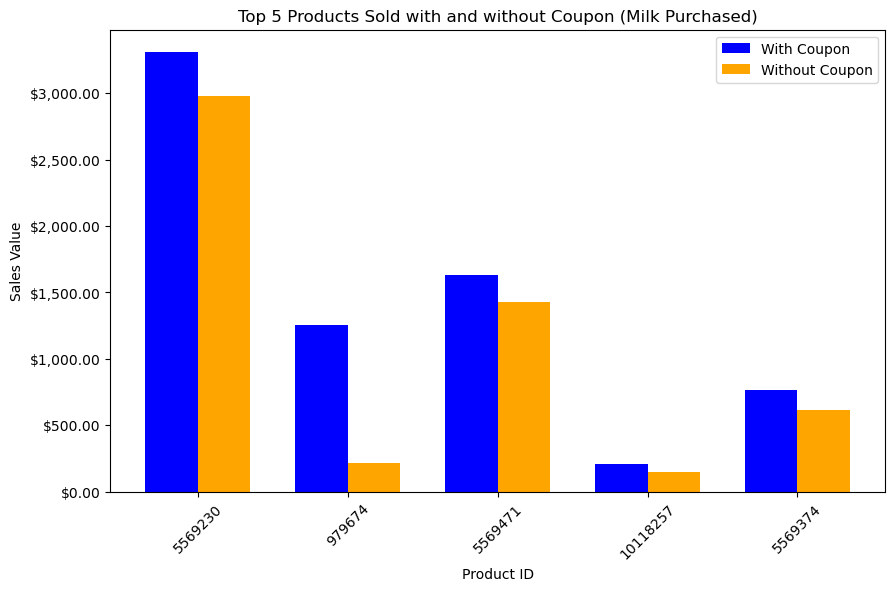

In [17]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(top_product_ids_milk_coupon))
r2 = [x + bar_width for x in r1]

# Plot the bar chart for products with coupon
plt.bar(r1, top_product_ids_milk_coupon['sales_value'], color='blue', width=bar_width, label='With Coupon')

# Plot the bar chart for products without coupon
plt.bar(r2, top_product_ids_milk_nocoup.set_index('product_id').loc[top_product_ids_milk_coupon['product_id'], 'sales_value'], color='orange', width=bar_width, label='Without Coupon')

# Set the x-axis ticks and labels
plt.xticks(np.arange(len(top_product_ids_milk_coupon)) + bar_width / 2, top_product_ids_milk_coupon['product_id'])

# Set the y-axis format as dollars with commas
formatter = ticker.StrMethodFormatter('${x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title and labels
plt.title('Top 5 Products Sold with and without Coupon (Milk Purchased)')
plt.xlabel('Product ID')
plt.ylabel('Sales Value')

# Set the legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()



In [18]:
prod_id=979674
filtered_df_prod = dt_df[dt_df['product_id'] == prod_id]
filtered_df_prod.head()
#filtered_df_prod.groupby("age").agg({"sale_value":"sum"})

household_id    age  income      home_ownership marital_status  \
746470          1488  25-34  50-74K  Probable Homeowner        Married   
746471          1488  25-34  50-74K  Probable Homeowner        Married   
746472          1488  25-34  50-74K  Probable Homeowner        Married   
746473          1488  25-34  50-74K  Probable Homeowner        Married   
746474          1488  25-34  50-74K  Probable Homeowner        Married   

       household_size household_comp kids_count  store_id    basket_id  ...  \
746470              2   1 Adult Kids          1       306  36002272805  ...   
746471              2   1 Adult Kids          1       306  40199016749  ...   
746472              2   1 Adult Kids          1       306  40889262360  ...   
746473              2   1 Adult Kids          1       306  41124237157  ...   
746474              2   1 Adult Kids          1       306  41383257156  ...   

        coupon_disc  coupon_match_disc  week  transaction_timestamp  \
746470          3.0                0.0    38    2017-09-14 13:23:03   
746471          0.0                0.0    41    2017-10-02 21:18:29   
746472          0.0                0.0    49    2017-11-27 23:56:36   
746473          0.0                0.0    50    2017-12-08 23:08:34   
746474          2.0                0.0    52    2017-12-24 18:57:33   

        manufacturer_id  department     brand product_category  product_type  \
746470              111     DRUG GM  National       CIGARETTES    CIGARETTES   
746471              111     DRUG GM  National       CIGARETTES    CIGARETTES   
746472              111     DRUG GM  National       CIGARETTES    CIGARETTES   
746473              111     DRUG GM  National       CIGARETTES    CIGARETTES   
746474              111     DRUG GM  National       CIGARETTES    CIGARETTES   

       package_size  
746470          CTN  
746471          CTN  
746472          CTN  
746473          CTN  
746474          CTN  

[5 rows x 24 columns]

In [19]:
sales_no_coupon = shared_basket_milk[(shared_basket_milk['product_id'] == 979674) & (shared_basket_milk['total_coupon'] == 0)]
sales_with_coupon = shared_basket_milk[(shared_basket_milk['product_id'] == 979674) & (shared_basket_milk['total_coupon'] > 0)]

sales_by_month_no_coupon = sales_no_coupon.groupby(sales_no_coupon['transaction_timestamp'].dt.month)['sales_value'].sum().reset_index()
sales_by_month_with_coupon = sales_with_coupon.groupby(sales_with_coupon['transaction_timestamp'].dt.month)['sales_value'].sum().reset_index()


#display(sales_no_coupon)
#display(sales_with_coupon)

In [20]:
# Create a Bokeh ColumnDataSource for each line graph
# Convert the Series to DataFrames
sales_by_month_no_coupon = sales_by_month_no_coupon.rename(columns={'sales': 'sales_value'})
sales_by_month_with_coupon = sales_by_month_with_coupon.rename(columns={'sales': 'sales_value'})

# Create a Bokeh ColumnDataSource for each line graph
source_no_coupon = ColumnDataSource(sales_by_month_no_coupon)
source_with_coupon = ColumnDataSource(sales_by_month_with_coupon)

# Create a figure
p = figure(
    x_axis_label='Month', 
    y_axis_label='Sales', 
    frame_height=600, 
    frame_width=1024, 
    title='Sales by Month for Product 979674, When Purchased with Milk')

# Add line graphs
p.line(x='transaction_timestamp', y='sales_value', source=source_no_coupon, line_color='blue', legend_label='No Coupon')
p.line(x='transaction_timestamp', y='sales_value', source=source_with_coupon, line_color='red', legend_label='With Coupon')

# Add legend
p.legend.location = 'top_right'

# Show the plot
bokeh.io.show(p)

## Summary
Provided with the macro-level view of the data it is challenging to provide suggestions as to how Regork can attract new consumers or retain the existing base. However, it does display how we are able to manipulate data in ways that either support or disprove current business strategies.

Data for Regork was analyzed to answer the business question :" Is there a relationship between household composition (adults vs adults and children) and purchased product that will help Regork find opportunities for growth?". The data was loaded, grouped, aggregated, and analyzed based on this initial question. Interestingly, a pattern emerged that showed Milk products were 28%-30% of house hold transactions, which shifted the question to : "Can a relationship be leveraged between products frequently purchased with milk to find revenue growth?" Furthermore opportunities for leveraging coupon promotions combined with Milk purchases were also explored. It was captivating to observe how the initial question and analysis resulted in a different proposed business solution than was initially pursued.

The proposed business solution for Regork is to maintain coupon promotions for product 979674, while concurrently implementing a strategy of running promotions for both Milk products and product 979674.  Based on our analysis, we believe this strategy will enhance the revenue generated by product 979674. By enticing customers to visit the store for Milk, a product they frequently purchase regardless of coupons, they will also be motivated to take advantage of the coupon promotion for product 979674.

The analysis faces two notable limitations: a limited timeframe for the data and the data analyst's limited experience with the grocery business. By incorporating data from longer timeframes, stronger relationships can be explored and studied in greater detail. Furthermore, an analyst with a deeper understanding of the grocery industry may possess stronger instincts regarding where to seek more robust insights within the data. Regork should continue to develop similar graphs and analysis to decide when to promote certain products, who buys their products, how they can make their products more attractive to various income levels and demographics along with many other various scenarios that look to drive overall sales. Although the specific situations may differ, the fundamental truth remains unchanged: manipulating and visualizing extensive data sets offer companies invaluable insights that raw data alone cannot provide.